In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from scipy.stats import linregress
from citipy import citipy 

from config import api_key

In [2]:
lat_range = (-90,90)
long_range = (-180,180)

coordinates = []
cities = []

lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)
long = np.random.uniform(long_range[0], long_range[1], size=1500)
coordinates = zip(lat, long)

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

641

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="
response = requests.get(query_url+cities[3]).json()

print(response)

{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 44.6, 'feels_like': 31.86, 'temp_min': 44.6, 'temp_max': 44.6, 'pressure': 995, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 230}, 'clouds': {'all': 20}, 'dt': 1600805002, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1600770022, 'sunset': 1600813869}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}


In [4]:
data=[]
i=0

print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:

    json_info = requests.get(query_url + city).json()
    i+=1
    
    try:
        temp=json_info["main"]['temp_max']
        humidity=json_info["main"]["humidity"]
        speed=json_info['wind']["speed"]
        cloudiness=json_info["clouds"]["all"]
        lat=json_info["coord"]["lat"]
        country=json_info['sys']["country"]
        date=json_info['dt']
        lon=json_info["coord"]["lon"]
        data.append([date,city,country,lat,lon,temp,humidity,cloudiness,speed])
        print(f"Processing Record {i} || {city}")
    except KeyError:
        print("City not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 || hobart
Processing Record 2 || jiangyou
Processing Record 3 || new norfolk
Processing Record 4 || ushuaia
Processing Record 5 || abu samrah
Processing Record 6 || bambous virieux
Processing Record 7 || coquimbo
Processing Record 8 || portland
Processing Record 9 || pevek
Processing Record 10 || rikitea
Processing Record 11 || cockburn town
Processing Record 12 || busca
City not found. Skipping...
Processing Record 14 || talcahuano
Processing Record 15 || bubaque
Processing Record 16 || kahului
Processing Record 17 || lusambo
Processing Record 18 || kapaa
Processing Record 19 || busselton
Processing Record 20 || tuatapere
Processing Record 21 || barrow
Processing Record 22 || tasiilaq
Processing Record 23 || albany
Processing Record 24 || pendleton
Processing Record 25 || aldan
Processing Record 26 || hithadhoo
Processing Record 27 || hilo
Processing Record 28 || georgetown
Processing Record 29 || mataura
Proce

Processing Record 245 || cam ranh
Processing Record 246 || maunabo
Processing Record 247 || almaznyy
Processing Record 248 || setubal
City not found. Skipping...
Processing Record 250 || bonavista
Processing Record 251 || saint george
Processing Record 252 || rizhao
Processing Record 253 || charters towers
Processing Record 254 || omsukchan
Processing Record 255 || songea
Processing Record 256 || sioux lookout
Processing Record 257 || huanuco
Processing Record 258 || kosonsoy
Processing Record 259 || formosa
Processing Record 260 || verkhoyansk
Processing Record 261 || rumonge
City not found. Skipping...
Processing Record 263 || talara
Processing Record 264 || cherskiy
Processing Record 265 || makakilo city
Processing Record 266 || omboue
City not found. Skipping...
Processing Record 268 || labrea
Processing Record 269 || cabo san lucas
Processing Record 270 || denpasar
Processing Record 271 || najran
Processing Record 272 || channel-port aux basques
Processing Record 273 || taksimo
Pr

Processing Record 485 || vila velha
Processing Record 486 || asau
Processing Record 487 || kibre mengist
Processing Record 488 || verkhnyaya inta
Processing Record 489 || la tuque
City not found. Skipping...
Processing Record 491 || solwezi
Processing Record 492 || mitu
Processing Record 493 || port keats
Processing Record 494 || san ciro de acosta
Processing Record 495 || sisimiut
Processing Record 496 || zhezkazgan
Processing Record 497 || baghdad
Processing Record 498 || alto longa
Processing Record 499 || timizart
City not found. Skipping...
Processing Record 501 || chernyshevskiy
Processing Record 502 || birin
Processing Record 503 || aksay
Processing Record 504 || waingapu
Processing Record 505 || lampitak
Processing Record 506 || duldurga
Processing Record 507 || rio grande
Processing Record 508 || kavaratti
Processing Record 509 || kabo
Processing Record 510 || moree
Processing Record 511 || les cayes
Processing Record 512 || praia
Processing Record 513 || inhambane
Processing 

In [12]:
city_weather_df = pd.DataFrame(data, columns=["Date","City","Country",
                                   "Lat","Long",
                                   "Max Temp","Humidity",
                                   "Cloudiness","Wind Speed"])

output_file = 'output_data/cities.csv'
city_weather_df.to_csv(output_file)

city_weather_df.head()

,Date,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
0,1600804868,hobart,AU,-42.88,147.33,50.00,71,90,17.22
1,1600805035,jiangyou,CN,31.77,104.72,62.65,86,88,0.85
2,1600804328,new norfolk,AU,-42.78,147.06,46.99,78,77,1.99
3,1600805002,ushuaia,AR,-54.80,-68.30,44.60,70,20,17.22
4,1600805035,abu samrah,SY,35.30,37.18,69.08,80,0,9.19


In [17]:
high_humidity = city_weather_df[city_weather_df['Humidity'] >100].index

high_humidity

Int64Index([], dtype='int64')

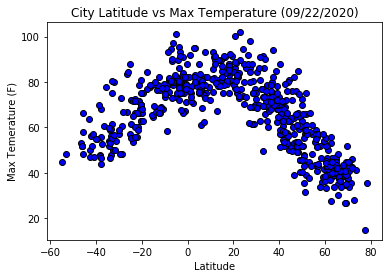

In [27]:
temps= city_weather_df['Max Temp']
lats = city_weather_df['Lat']

plt.scatter(lats, temps, marker='o', color='blue', edgecolors='black')
plt.title('City Latitude vs Max Temperature (09/22/2020)')
plt.ylabel('Max Temerature (F)')
plt.xlabel('Latitude')
plt.show()

This is a scatter plot showing the relationship between city latitude and temperature. This shows that the closer to 0, or the equator, the higher the temperature.

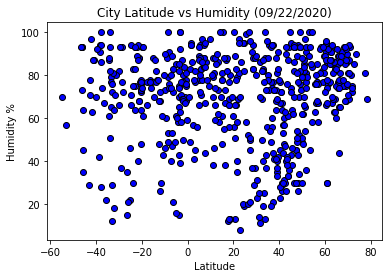

In [28]:
humid = city_weather_df['Humidity']

plt.scatter(lats, humid, marker='o', color='blue', edgecolors='black')
plt.title('City Latitude vs Humidity (09/22/2020)')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.show()

This is a scatter plot showing the relationship between city latitude and humidity. There seems to be more humidity in the northern hemisphere.

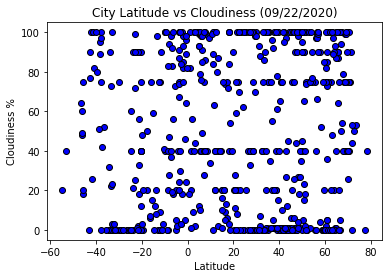

In [29]:
clouds = city_weather_df['Cloudiness']

plt.scatter(lats, clouds, marker='o', color='blue', edgecolors='black')
plt.title('City Latitude vs Cloudiness (09/22/2020)')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.show()

This is a scatter plot showing the relationship between city latitude and cloudiness. The data doesnt seem to show any direct pattern.

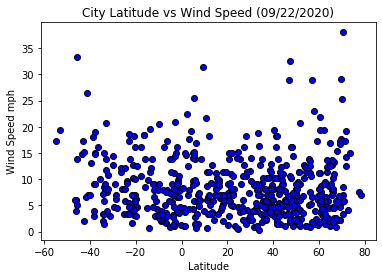

In [30]:
wind = city_weather_df['Wind Speed']

plt.scatter(lats, wind, marker='o', color='blue', edgecolors='black')
plt.title('City Latitude vs Wind Speed (09/22/2020)')
plt.ylabel('Wind Speed mph')
plt.xlabel('Latitude')
plt.show()

This is a scatter plot showing the relationship between city latitude and wind speed. It looks like winds are generally below 20 mph in most of the cities.

In [31]:
northern =city_weather_df.loc[(city_weather_df["Lat"]>=0)]
southern =city_weather_df.loc[(city_weather_df["Lat"]<0)]

### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7114983057547469


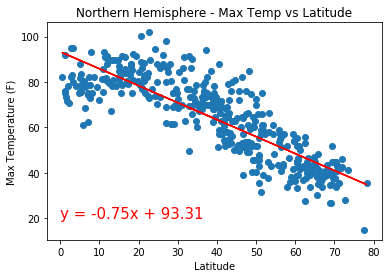

In [33]:
x_values = northern['Lat']
y_values = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5830620616090089


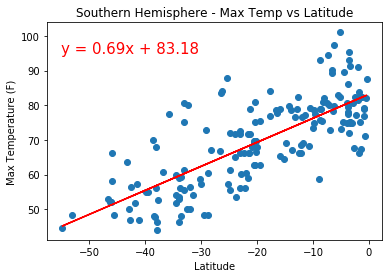

In [36]:
x_values = southern['Lat']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

This is a scatter plot with a linear regression showing the relationship between latitude and temperature in both northern and southern hemispheres. There looks to be a fairly stong negative relationsip between the two in the northern hemisphere and a fairly strong positive relationship between the two in the southern hemisphere.

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.011390553847203024


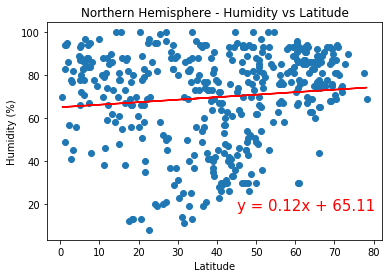

In [38]:
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,17),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0008222862718729925


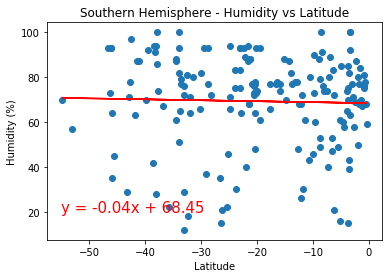

In [40]:
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

This is a scatter plot with a linear regression showing the relationship between latitude and Humidity in both northern and southern hemispheres. There doesn't seem to be a strong relation between the two in both hemispheres. 

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.00045572227984790693


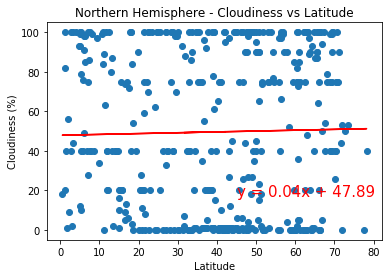

In [41]:
x_values = northern['Lat']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,17),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02314025356694509


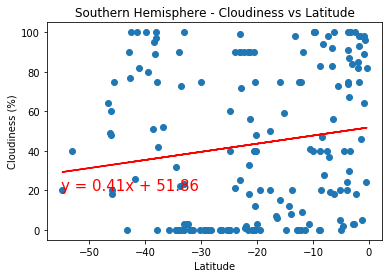

In [42]:
x_values = southern['Lat']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

This is a scatter plot with a linear regression showing the relationship between latitude and cloudiness in both northern and southern hemispheres. There looks to slight positive relationshi between the two in the southern hemisphere but not much of a relationship in the northern hemisphere. 

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 5.635118885981548e-07


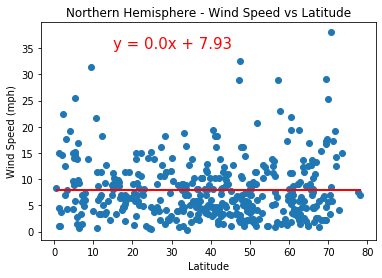

In [44]:
x_values = northern['Lat']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,35),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06293248141833387


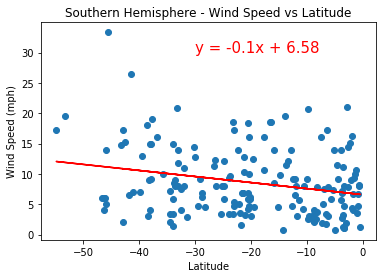

In [46]:
x_values = southern['Lat']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

This is a scatter plot with a linear regression showing the relationship between latitude and temperature in both northern and southern hemispheres. There doesn't seem to be much of a relationship between the two in both hemispheres. 